# The moons dataset
#### The "Moons" dataset consists of samples generated from two interleaving half circles. It's a synthetic dataset commonly used to demonstrate non-linear classification algorithms. Each sample has two features, making it suitable for visualization and easy to plot on a 2D graph.

In [3]:
from sklearn.datasets import make_moons

In [4]:
# Generate Moons dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

In [5]:
#plot the dataset
import matplotlib.pyplot as plt

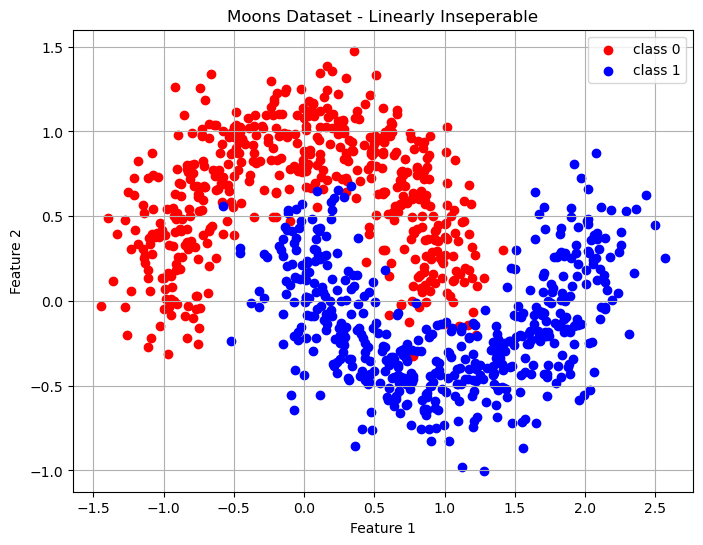

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(X[y==0][:,0],X[y==0][:,1], color='red', label='class 0')
plt.scatter(X[y==1][:,0],X[y==1][:,1], color='blue', label='class 1')
plt.title('Moons Dataset - Linearly Inseperable')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [15]:
rbf_kernel_pipeline = Pipeline([
    ("StandardScaler",StandardScaler()),
    ("SVM_classifier", SVC(kernel='rbf', gamma=5, C=0.1))
])
rbf_kernel_pipeline

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('SVM_classifier', SVC(C=0.1, gamma=5))])

## Split the dataset into train and test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

## Fit the train data

In [23]:
rbf_kernel_pipeline.fit(X_train, y_train)

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('SVM_classifier', SVC(C=0.1, gamma=5))])

## Plot the decision boundary

In [24]:
import numpy as np

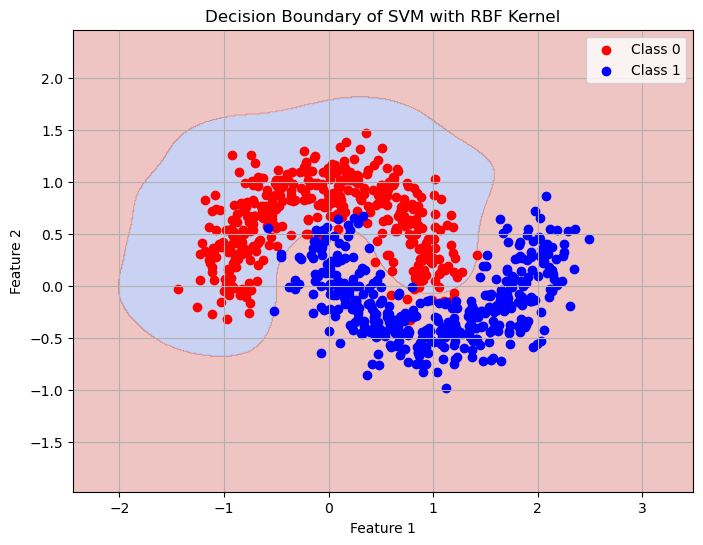

In [28]:
# Generate a meshgrid of points covering the feature space
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict class labels for each point in the meshgrid
Z = rbf_kernel_pipeline.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and training data
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 1')
plt.title('Decision Boundary of SVM with RBF Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Predict on test data
y_pred = rbf_kernel_pipeline.predict(X_test)

# Evaluate accuracy
accuracy = (y_pred == y_test).mean()*100
print("Accuracy on testing set:", accuracy)


Accuracy on test set: 98.0
